<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



$ \ $


# ***Principle Component Analysis - PCA***

$ \ $

$\color{aquamarine}{\text{Principal Component Analysis (PCA)}}$ is a widely used technique in machine learning and data analysis with several important use cases. Here are some common use cases of PCA:

$(1)$ $\color{lightblue}{\text{Dimensionality Reduction:}}$ PCA is primarily used for dimensionality reduction. It can identify the most important features or variables in a dataset and create a reduced set of uncorrelated variables called principal components. By selecting a subset of these components, PCA can effectively reduce the dimensionality of the data while retaining as much information as possible.

$(2)$ $\color{lightblue}{\text{Data Visualization:}}$ PCA is often employed for visualizing high-dimensional data in a lower-dimensional space. It can transform the data into a reduced number of dimensions (typically two or three) while preserving the relationships and patterns within the original data. This visualization can provide insights into the structure of the data and aid in identifying clusters or patterns.

$(3)$ $\color{lightblue}{\text{Noise Filtering:}}$ In some datasets, there may be noise or irrelevant features that can hinder machine learning algorithms' performance. PCA can help eliminate or reduce the impact of this noise by filtering out the components with low variance. By focusing on the principal components with the highest variance, PCA can capture the most relevant information in the data.

$(4)$ $\color{lightblue}{\text{Feature Extraction:}}$ PCA can be utilized to extract important features from a larger set of variables. By selecting a subset of the principal components, which explain the majority of the variance in the data, PCA can create a new set of features that can be more informative and less redundant than the original variables. These extracted features can be subsequently used for various machine learning tasks.

$(5)$ $\color{lightblue}{\text{Data Preprocessing:}}$ PCA can serve as a preprocessing step in machine learning pipelines. It can help in standardizing and decorrelating the input data, which can improve the performance of certain algorithms. PCA can also help deal with multicollinearity issues by identifying and removing highly correlated variables.

$(6)$ $\color{lightblue}{\text{Anomaly Detection:}}$ PCA can be used for anomaly or outlier detection. By constructing a model based on the principal components of normal data, it becomes possible to identify data points that deviate significantly from the expected patterns. Unusual observations can be detected by measuring their distance or reconstruction error from the PCA model.

These are just a few examples of how PCA is applied in machine learning. Its versatility and ability to capture the most important information in a dataset make it a valuable tool for various data analysis tasks. In this notebook, you will explore how to simplify and reduce the dimensionality of various data using principle component analysis (PCA)

$ \ $

----

## ***Objectives***

$ \ $


After completing this lab you will be able to:

* Understand what PCA is and how (generally) it works.

* Understand when PCA is useful.

* Apply PCA effectively.

$ \ $

----

## ***Datasets***

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.

$ \ $

-----

## ***Importing Required Libraries***

For this lab, we will be using the following libraries:

*   [pandas](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for managing the data.


*   [numpy](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for mathematical operations.


*   [sklearn](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for machine learning and machine-learning-pipeline related functions.


*   [seaborn](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for visualizing the data.


*   [matplotlib](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) for additional plotting tools.


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
from itertools import accumulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform
%matplotlib inline

In [2]:
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)
warnings.filterwarnings("ignore", category = FutureWarning)

In [3]:
sns.set_context('notebook')
sns.set_style('white')

$ \ $

----

## ***Defining Helper Functions***

$ \ $

The following code generates a stacked area plot that visualizes the accumulated explained variance ratios of the principal components obtained from PCA. It helps in understanding how much variance is captured by each component and how much cumulative variance is explained as more components are considered.

In [4]:
# Esta línea define una función llamada plot_explained_variance que toma un parámetro pca, que se espera que sea una instancia de la clase PCA (Análisis de componentes principales).
def plot_explained_variance(pca):

    # Esta línea utiliza la función de acumulación del módulo itertools para calcular los índices de varianza explicados acumulados. Toma el atributo added_variance_ratio_ del objeto pca, que representa la varianza explicada por cada componente principal, y los acumula en una lista llamada acc.
    acc = [*accumulate(pca.explained_variance_ratio_)]

    # creamos una nueva figura y un conjunto de subgráficos usando la función plt.subplots del módulo matplotlib.pyplot. Devuelve un objeto de figura fig y un objeto de eje ax para una mayor personalización. El 1 indica que habrá una única subplot y figsize=(50, 20) establece el tamaño de la figura.
    fig, ax = plt.subplots(1, figsize = (50, 20))

    # Esta línea traza un diagrama de pila usando la función de diagrama de pila del objeto ax. Toma el rango de pca.n_components_ (el número de componentes principales) en el eje x y las razones de varianza explicadas acumuladas acc en el eje y.
    n = pca.n_components_
    x = range(n)
    y = acc

    # Esta linea crea un gráfico de áreas apiladas que muestra la contribución de cada componente a la varianza total.
    ax.stackplot(x, y)

    # Esta línea agrega puntos de dispersión al gráfico usando la función de dispersión del objeto ax. Toma los mismos datos del eje x y del eje y que la línea anterior (rango (pca.n_components_) y acc) y establece el color de los puntos de dispersión en negro.
    ax.scatter(x, y, color = 'black')

    # Esta línea establece los límites del eje y de la gráfica, especificando el rango de 0 a 1. Esto asegura que el eje y represente la relación de varianza explicada acumulada, que siempre está entre 0 y 1.
    ax.set_ylim(0, 1)

    # Esta línea establece los límites del eje x de la gráfica, especificando el rango de 0 a pca.n_components_-1. Asegura que el eje x representa los índices de los componentes principales, a partir de 0.
    ax.set_xlim(0, n-1)

    # Esta línea establece los parámetros de marca para el eje x y el eje y del gráfico. Establece el tamaño de la etiqueta en 36, controlando el tamaño de fuente de las etiquetas de marca.
    ax.tick_params(axis = 'both', labelsize = 36)

    # Esta línea establece la etiqueta para el eje x de la gráfica en 'N Componentes' y establece el tamaño de fuente en 48.
    ax.set_xlabel('N Components', fontsize = 48)

    # Esta línea establece la etiqueta para el eje y de la gráfica en 'Accumulated explained variance' y establece el tamaño de fuente en 48.
    ax.set_ylabel('Accumulated explained variance', fontsize = 48)

    # Esta línea ajusta el espacio entre las subtramas para garantizar que encajen correctamente en la figura.
    plt.tight_layout()

    # Esta línea muestra la imagen construida en pantalla
    plt.show()

$ \ $

-----

## ***How does PCA work?***

$ \ $

$(1)$ $\color{lightblue}{\text{Given an n-dimensional dataset:}}$ Let's assume we have a dataset with $m$ instances, each represented by an $n$-dimensional vector. We can represent the dataset as $X ∈ ℝ^{m×n}$, where each row of $X$ corresponds to an instance.

$(2)$ $\color{lightblue}{\text{Standardize the dataset:}}$ To ensure that all features contribute equally, we first standardize the dataset by subtracting the mean and dividing by the standard deviation for each feature.

$$x \longrightarrow \dfrac{x-\mu}{\sigma}$$

$(3)$ $\color{lightblue}{\text{Compute the covariance matrix:}}$ We calculate the covariance matrix $Σ ∈ ℝ^{n×n}$ of the standardized dataset $X$. The $(i, j)$-th entry of $Σ$ represents the covariance between the $i$-th and $j$-th features.

$(4)$ $\color{lightblue}{\text{Compute eigenvectors and eigenvalues:}}$ We compute the eigenvectors $v_{1}, v_{2}, ..., v_{n}$ and eigenvalues $λ_{1}, λ_{2}, ..., λ_{n}$ of the covariance matrix $Σ$. The eigenvectors $v_{i}$ correspond to the principal components, and the eigenvalues $λ_{i}$ indicate the amount of variance explained by each principal component.

$(5)$ $\color{lightblue}{\text{Sort the components:}}$ We sort the eigenvectors and eigenvalues in descending order based on the eigenvalues. This ensures that the principal components are ranked by the amount of variance they explain, with the highest eigenvalue corresponding to the first principal component.

$(6)$ $\color{lightblue}{\text{Choose the desired dimension:}}$ Based on a chosen parameter $k$, we select the top $k$ - eigenvectors (principal components) that account for the most explained variance. These $k$ - eigenvectors form a projection matrix $P ∈ ℝ^{n×k}$, where each column represents a selected principal component.

$(7)$ $\color{lightblue}{\text{Project the data:}}$ We project the standardized dataset $X$ onto the $k$-dimensional subspace spanned by the selected principal components. The projected data $Y ∈ ℝ^{m×k}$ is obtained by multiplying the standardized data $X$ by the projection matrix $P$:

$$X \longrightarrow T(X) = Y = X ⋅ P$$

$(8)$ $\color{lightblue}{\text{Reconstruction (optional):}}$ If desired, we can reconstruct the data in the original $n$-dimensional space from the projected data $Y$. The reconstructed data $Z ∈ ℝ^{m×n}$ is obtained by multiplying the projected data $Y$ by the transpose of the projection matrix $P$.

$$Y \longrightarrow S(Y) =  Z = Y ⋅ P^{T}$$


By following these steps, $PCA$ effectively reduces the dimensionality of the data by selecting a subset of principal components that capture the most significant variations. The data is projected onto a lower-dimensional space, preserving the essential patterns and relationships present in the original dataset.

$ \ $

----

## ***Example ($PCA$).***


$ \ $

$(1)$ $\color{lightgreen}{\text{Give an n-dimensional dataset:}}$ Load the dataset `HeightsWeights.csv` which contains a list of various people's heights (in inches) and weight (in pounds and kg).

In [5]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv'
hwdf = pd.read_csv(url, index_col = 0)
hwdf.head()

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546
4,68.21660,142.3354,64.562914
5,67.78781,144.2971,65.452735


$(2)$ $\color{lightgreen}{\text{Standardize the dataset:}}$ We standarize our dataset.

In [6]:
# Esta línea crea una instancia de la clase StandardScaler del módulo sklearn.preprocessing. StandardScaler es un paso de preprocesamiento que se utiliza para estandarizar los datos restando la media y dividiendo por la desviación estándar.
scaler = StandardScaler()

# Esta línea aplica el método fit_transform de StandardScaler al marco de datos hwdf. Escala los valores de cada columna en el DataFrame en función de su media y desviación estándar. La sintaxis [:] asigna los valores escalados al DataFrame original, reemplazando los valores originales con los valores estandarizados.
# X -----> T(X) y luego actualizamos los datos
hwdf[:] = scaler.fit_transform(hwdf)

# describimos las columnas del dataframe
columnas = hwdf.columns

# actualizamos los nombres de las columnas del dataframe
hwdf.columns = [f'{c} (scaled)' for c in columnas]

# mostramos los primeros 5 renglones del dataframe actualizado
hwdf.head()

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214
4,0.117523,1.308328,1.308328
5,-0.107961,1.476561,1.476561


In [7]:
# Esta línea extrae los valores de las columnas del DataFrame hwdf y los asigna a las variables xs, ys y zs. Cada variable corresponde a los valores de una columna del DataFrame.
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

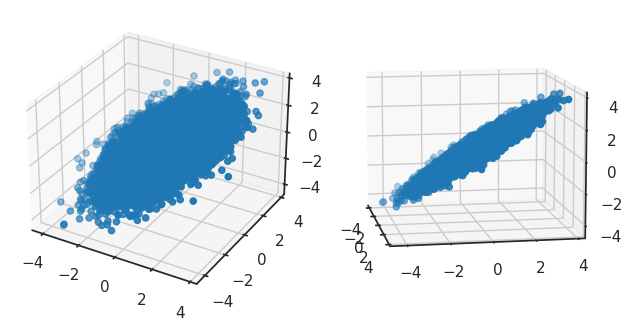

In [8]:
# Esta línea crea una nueva figura en la que se pueden colocar subplots para visualizar gráficos. La figura es la ventana general en la que se mostrarán los gráficos.
fig = plt.figure()


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea crea una subplot en la posición (1, 2, 1) de la figura y la configura para mostrar un gráfico tridimensional (3D). La opción projection='3d' indica que se desea un gráfico en 3D. La variable ax1 se utiliza para referirse a esta subplot.
ax1 = fig.add_subplot(121, projection = '3d')


# Esta línea dibuja un gráfico de dispersión tridimensional en la subtrama ax1. Los valores de xs, ys y zs se utilizan para determinar las coordenadas de los puntos en el gráfico de dispersión.
ax1.scatter(xs, ys, zs)


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea crea otra subplot en la posición (1, 2, 2) de la figura y la configura para mostrar un gráfico tridimensional (3D). La variable ax2 se utiliza para referirse a esta subtrama.
ax2 = fig.add_subplot(122, projection = '3d')

# Esta línea establece la vista del gráfico en 3D en la subtrama ax2. Los parámetros elev y azim especifican el ángulo de elevación y el ángulo azimutal, respectivamente, para determinar cómo se ve el gráfico desde diferentes perspectivas.
ax2.view_init(elev = 10, azim = -10)

# Esta línea dibuja un gráfico de dispersión tridimensional en la subtrama ax2 con las coordenadas especificadas por xs, ys y zs.
ax2.scatter(xs, ys, zs)


# -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea ajusta automáticamente el espaciado entre los gráficos y los márgenes de la figura para que todo se muestre correctamente.
plt.tight_layout()

# mostramos la imagen creada anteriormente en pantalla
plt.show()

As you can see, our data here forms a plane. This is because the weight in kilograms does not provide any more information than weight in pounds (or vice-versa). This becomes clear with the following, alternate perspective, showing the 2d relationships between the pairs of data and calculating the correlation.

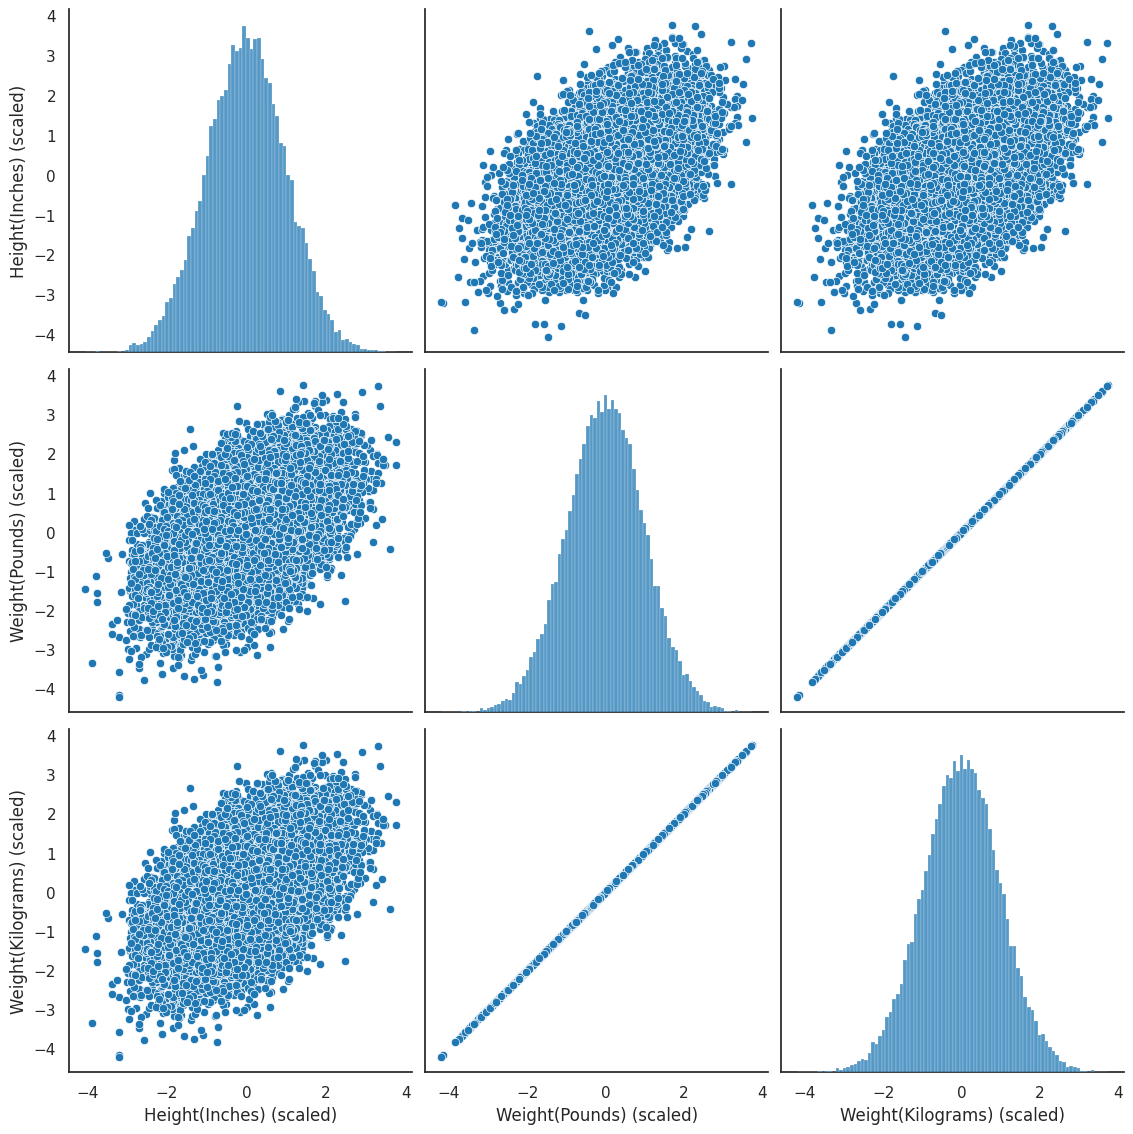

In [9]:
# realizamos un paiplot del datframe
g = sns.pairplot(hwdf)

# ajustamos el tamaño del plot
g.fig.set_size_inches(12, 12)

# mostramos el plot en pantalla
plt.show()

$ \ $

$(3)$ $\color{lightgreen}{\text{Compute the covariance matrix:}}$ We calculate the covariance matrix of the dataframe.

In [10]:
hwdf.corr().style.background_gradient(cmap = 'coolwarm')

,Height(Inches) (scaled),Weight(Pounds) (scaled),Weight(Kilograms) (scaled)
Height(Inches) (scaled),1.000000,0.502859,0.502859
Weight(Pounds) (scaled),0.502859,1.000000,1.000000
Weight(Kilograms) (scaled),0.502859,1.000000,1.000000



El código `hwdf.corr().style.background_gradient(cmap='coolwarm')` tiene dos partes principales:

1. `hwdf.corr()`: Esta parte calcula la matriz de correlación del DataFrame `hwdf`. La función `corr()` calcula la correlación entre todas las columnas del DataFrame y devuelve una nueva DataFrame que muestra las correlaciones entre las diferentes variables. La matriz de correlación es una tabla que muestra cómo las variables están relacionadas entre sí.

2. `.style.background_gradient(cmap='coolwarm')`: Esta parte se aplica al DataFrame de la matriz de correlación y le da un formato visual. El método `style.background_gradient()` aplica un gradiente de color a las celdas del DataFrame. El argumento `cmap='coolwarm'` especifica el mapa de colores a utilizar, en este caso, "coolwarm", que es un gradiente que va desde tonos fríos (azules) hasta tonos cálidos (rojos).

En resumen, el código calcula la matriz de correlación del DataFrame `hwdf` y luego le aplica un formato visual utilizando un gradiente de color. El gradiente de color se aplica a las celdas de la matriz de correlación, lo que permite visualizar rápidamente las relaciones entre las diferentes variables del DataFrame. Los tonos más fríos indican una correlación negativa, los tonos más cálidos indican una correlación positiva y los tonos intermedios representan valores neutros o cercanos a cero.

$ \ $

$(4)$ $\color{lightgreen}{\text{Compute eigenvectors and eigenvalues:}}$ We will apply PCA to get the eigenvectors and eigenvalues.

In [11]:
# esta linea crea una instancia del objeto PCA sin especificar ningún parámetro
pca = PCA()

# se llama al método fit del objeto PCA y se le pasa el conjunto de datos hwdf como argumento. El método fit ajusta el modelo de PCA utilizando los datos de entrada hwdf.
pca.fit(hwdf)

PCA()

$ \ $

El código anterior utiliza la técnica de Análisis de Componentes Principales (PCA, por sus siglas en inglés) para realizar una reducción de la dimensionalidad en un conjunto de datos representado por la variable `hwdf`.

Aquí está el paso a paso de lo que hace el código:

> $(1)$ Se crea una instancia del objeto `PCA` sin especificar ningún parámetro. Esto crea un objeto PCA con la configuración predeterminada.

> $(2)$ Luego, se llama al método `fit` del objeto `PCA` y se le pasa el conjunto de datos `hwdf` como argumento. El método `fit` ajusta el modelo de PCA utilizando los datos de entrada `hwdf`.

Durante el ajuste, el PCA calcula las componentes principales del conjunto de datos, que son nuevas variables que capturan la mayor parte de la variabilidad en los datos originales. Estas componentes principales son combinaciones lineales de las variables originales y se organizan en orden descendente de importancia. El ajuste del PCA también hace las siguientes cosas:

* Realiza el cálculo de los valores propios y los vectores propios asociados a la matriz de covarianza de los datos, que son utilizados para determinar las componentes principales.

* Después de ejecutar este código, el objeto `pca` contendrá información ajustada del modelo de PCA.

* Puedes utilizar este objeto para realizar transformaciones de los datos originales a las componentes principales, así como para acceder a otras propiedades y métodos del PCA.

$ \ $

$(5)$ $\color{lightgreen}{\text{Choose the desired dimension:}}$  We can find the projection of the dataset onto the principal components call it `X_hat` , this is our "new" dataset, it is the same shape as the original dataset.

In [12]:
# Esta línea aplica la transformación de los datos hwdf utilizando el objeto pca previamente ajustado/entrenado. La función transform() toma los datos y los proyecta en el espacio de las componentes principales calculadas durante el ajuste.
X_hat = pca.transform(hwdf)

# Esta línea devuelve la forma (dimensiones) de la matriz X_hat. La propiedad shape de un arreglo NumPy devuelve una tupla con las dimensiones del arreglo. En este caso, X_hat.shape mostrará el número de filas y columnas de X_hat.
X_hat.shape

(25000, 3)

$ \ $

$(6)$ Let's look at the new dataset as a dataframe.

$$\overset{\sim}{X} \longrightarrow \text{Dataframe}$$

In [13]:
# describimos las columnas del dataframe hwdf
columnas =  hwdf.columns

# describimos el numero de columnas del dataframe
n = len(hwdf.columns)

# creamos una lista con los nuevos nombres de las columnas del siguiente dataframe
columnas = [f'Projection on Component {i+1}' for i in range(n)]

# creamos un dataframe con la data X_hat y con los nombres de las columnas creados con anterioridad
hwdf_PCA = pd.DataFrame(data = X_hat, columns = columnas)

# mostramos los primeros 5 renglones en pantalla del nuevo dataframe
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2,Projection on Component 3
0,2.051774,-0.243847,1.037366e-15
1,-1.866218,1.117813,5.715994e-16
2,-3.133436,-0.794420,1.168342e-16
3,-1.696186,-0.748473,-6.684928e-16
4,-1.803402,-1.058234,-4.608196e-16


$ \ $

$(7)$ Let's look at the principle components.

In [14]:
# Definimos una lista de colores colors, que contiene las etiquetas de colores utilizadas en las visualizaciones.
colors = ['red', 'orange', 'green']

# Se extraen los valores de las columnas del dataframe hwdf y se asignan a las variables xs, ys y zs.
xs, ys, zs = [hwdf[attr] for attr in hwdf.columns]

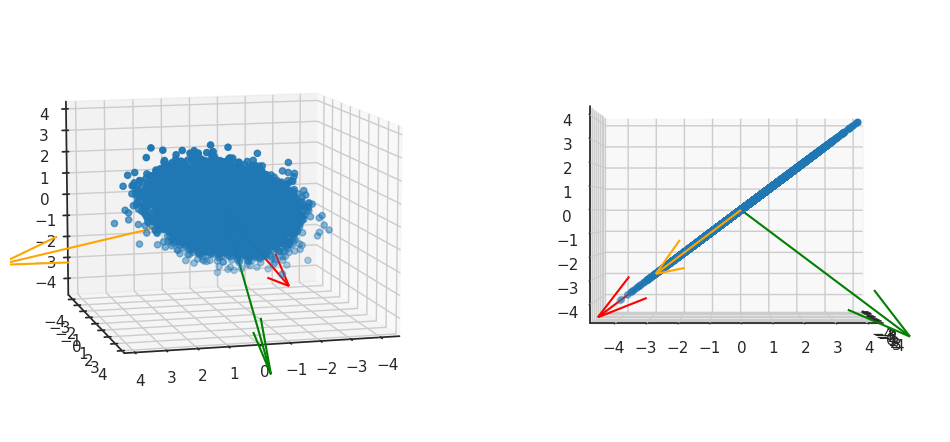

In [15]:
# Creamos una figura fig con un tamaño de 12x8 pulgadas.
fig = plt.figure(figsize = (12,8))


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Se añade un primer subplot ax1 a la figura, con una proyección 3D.
ax1 = fig.add_subplot(121, projection = '3d')

# Establecemos la vista de la gráfica con ax1.view_init(elev = 10, azim = 75)
ax1.view_init(elev = 10, azim = 75)

# Graficamos los puntos en el espacio
ax1.scatter(xs, ys, zs)


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Se añade un segundo subplot ax2 a la figura, también con una proyección 3D.
ax2 = fig.add_subplot(122, projection = '3d')

# se establece la vista de la gráfica con ax2.view_init(elev=0, azim = 0)
ax2.view_init(elev = 0, azim = 0)

# graficamos los puntos utilizando ax2.scatter(xs, ys, zs).
ax2.scatter(xs, ys, zs)


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Se utiliza un bucle for y la función zip para iterar sobre las componentes principales (pca.components_) y los colores definidos (colors).
for component, color in zip(pca.components_, colors):

  # La función ax1.quiver dibuja una flecha en el origen (0, 0, 0) con la dirección y longitud de cada componente multiplicada por 8. Estas flechas representan la dirección y magnitud de cada componente principal.
  ax1.quiver(*[0, 0, 0], *(8 * component), color = color)

  # La función ax1.quiver dibuja una flecha en el origen (0, 0, 0) con la dirección y longitud de cada componente multiplicada por 8. Estas flechas representan la dirección y magnitud de cada componente principal.
  ax2.quiver(*[0, 0, 0], *(8 * component), color = color)


# -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# mostramos en pantalla la imagen creada
plt.show()

In [16]:
# realizamos una iteración sobre el zip de colors y pca.explained_variance_ratio_
for color, variance in zip(colors, pca.explained_variance_ratio_):

  # describimos el porcentaje de la proporción de varianza explicada
  porcentaje = round(variance * 100, 2)

  # mostramos los colores que representan las correspondientes varianzas
  print(f'{color} component accounts for {porcentaje}% of explained variance')

red component accounts for 78.98% of explained variance
orange component accounts for 21.02% of explained variance
green component accounts for 0.0% of explained variance


The $3$ colored arrows represent the directions of maximum variance in the original data hwdf. The new dataset $\overset{\sim}{X}$ is the projection of $hwdf$ onto each principal component. Most of the original data seems parallel to the red principle components meaning they are the two most dominant directions of variance of hwdf. The green component is perpendicular to the data, as a result the projection is small.

$ \ $

$(8)$ We see the points appear uncorrelated.

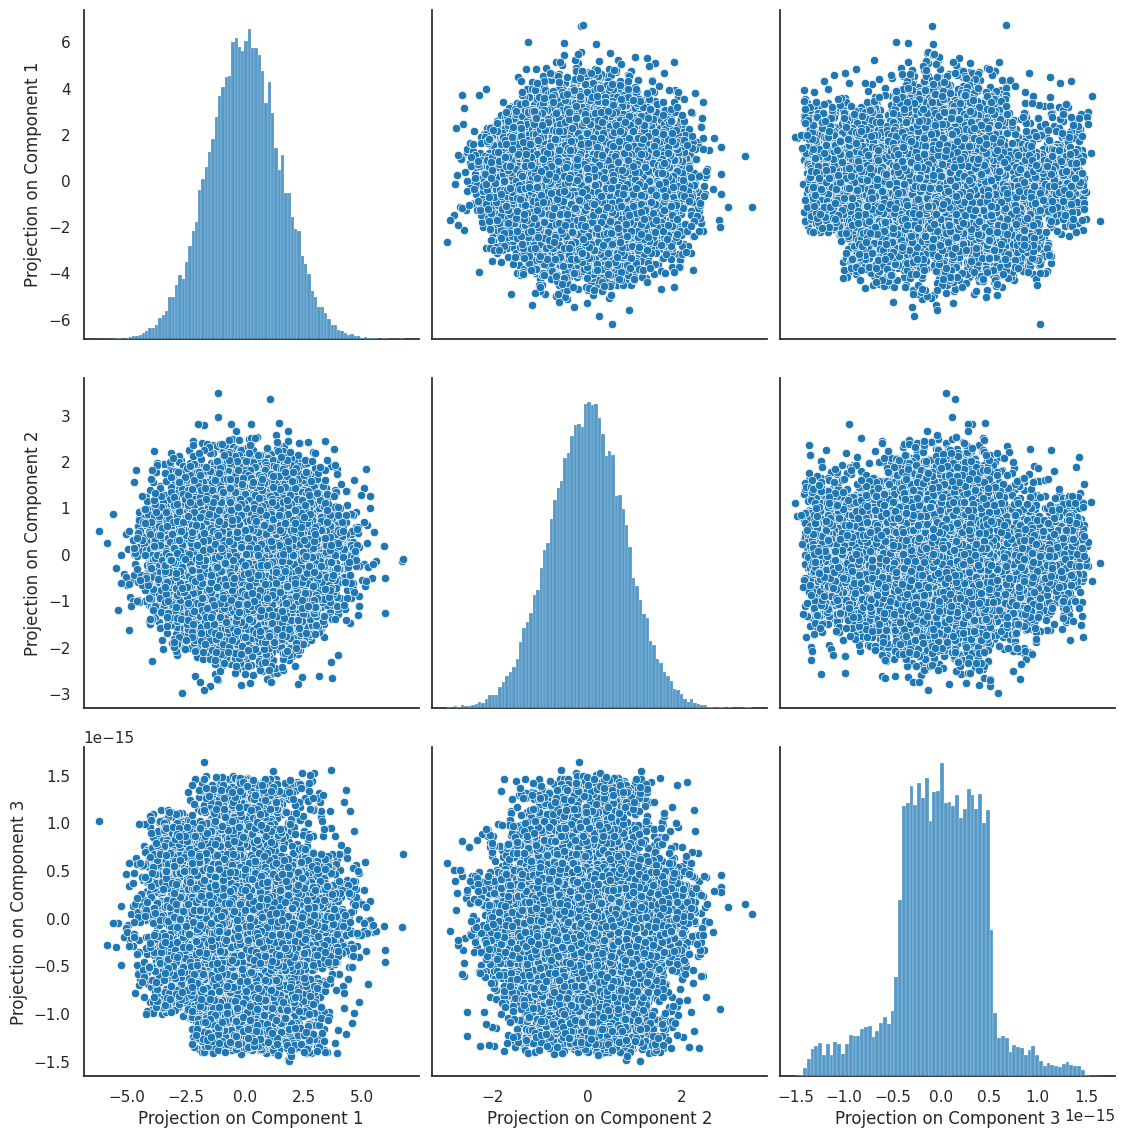

In [17]:
# realizamos el pairplot del conjunto de datos numericos hwdf_PCA = pd.DataFrame(data = X_hat, columns = columnas)
g = sns.pairplot(hwdf_PCA)

# ajustamos el tamaño de la imagen en pulgadas
g.fig.set_size_inches(12, 12)

# mostramos la imagen en pantalla
plt.show()

In [18]:
hwdf_PCA.corr().style.background_gradient(cmap = 'coolwarm')

,Projection on Component 1,Projection on Component 2,Projection on Component 3
Projection on Component 1,1.000000,-0.000000,-0.030706
Projection on Component 2,-0.000000,1.000000,-0.003708
Projection on Component 3,-0.030706,-0.003708,1.000000


As you can see, the correlations of the $3$ principal components are now zero, meaning we have successfully de-correlated $hwdf$ and obtained features that are linearly independent of each other. Each component provides variance/information on a different direction. As we saw before that, the third component had a small projection, which means it doesn't provide much information about our original data $hwdf$ in the new feature space.

$ \ $

$(9)$ We can remove the third dimension, while still keeping the vast majority of our data's information.

In [19]:
# como la tercera columna es tiene valores muy cercanos a cero, entonces la eliminamos
hwdf_PCA.head

<bound method NDFrame.head of        Projection on Component 1  Projection on Component 2  \
0                       2.051774                  -0.243847   
1                      -1.866218                   1.117813   
2                      -3.133436                  -0.794420   
3                      -1.696186                  -0.748473   
4                      -1.803402                  -1.058234   
...                          ...                        ...   
24995                   0.608133                   1.210008   
24996                   1.576087                  -1.222719   
24997                   1.747143                  -1.044829   
24998                  -0.446033                  -0.506547   
24999                   0.022979                   0.536042   

       Projection on Component 3  
0                   1.037366e-15  
1                   5.715994e-16  
2                   1.168342e-16  
3                  -6.684928e-16  
4                  -4.608196e-16  
...

In [20]:
# Esta línea utiliza el método drop() del DataFrame hwdf_PCA para eliminar la columna "Projection on Component 3". El argumento 'Projection on Component 3' especifica el nombre de la columna que se desea eliminar. El argumento axis = 1 indica que se debe eliminar una columna (en lugar de una fila) y el argumento inplace = True indica que se debe realizar el cambio directamente en el DataFrame hwdf_PCA sin crear una copia.
hwdf_PCA.drop('Projection on Component 3', axis = 1, inplace = True)

# mostramos los primeros 5 renglones del dataframe modificado
hwdf_PCA.head()

,Projection on Component 1,Projection on Component 2
0,2.051774,-0.243847
1,-1.866218,1.117813
2,-3.133436,-0.794420
3,-1.696186,-0.748473
4,-1.803402,-1.058234


$ \ $

$(10)$ Let's analyze the explained variance ratios.

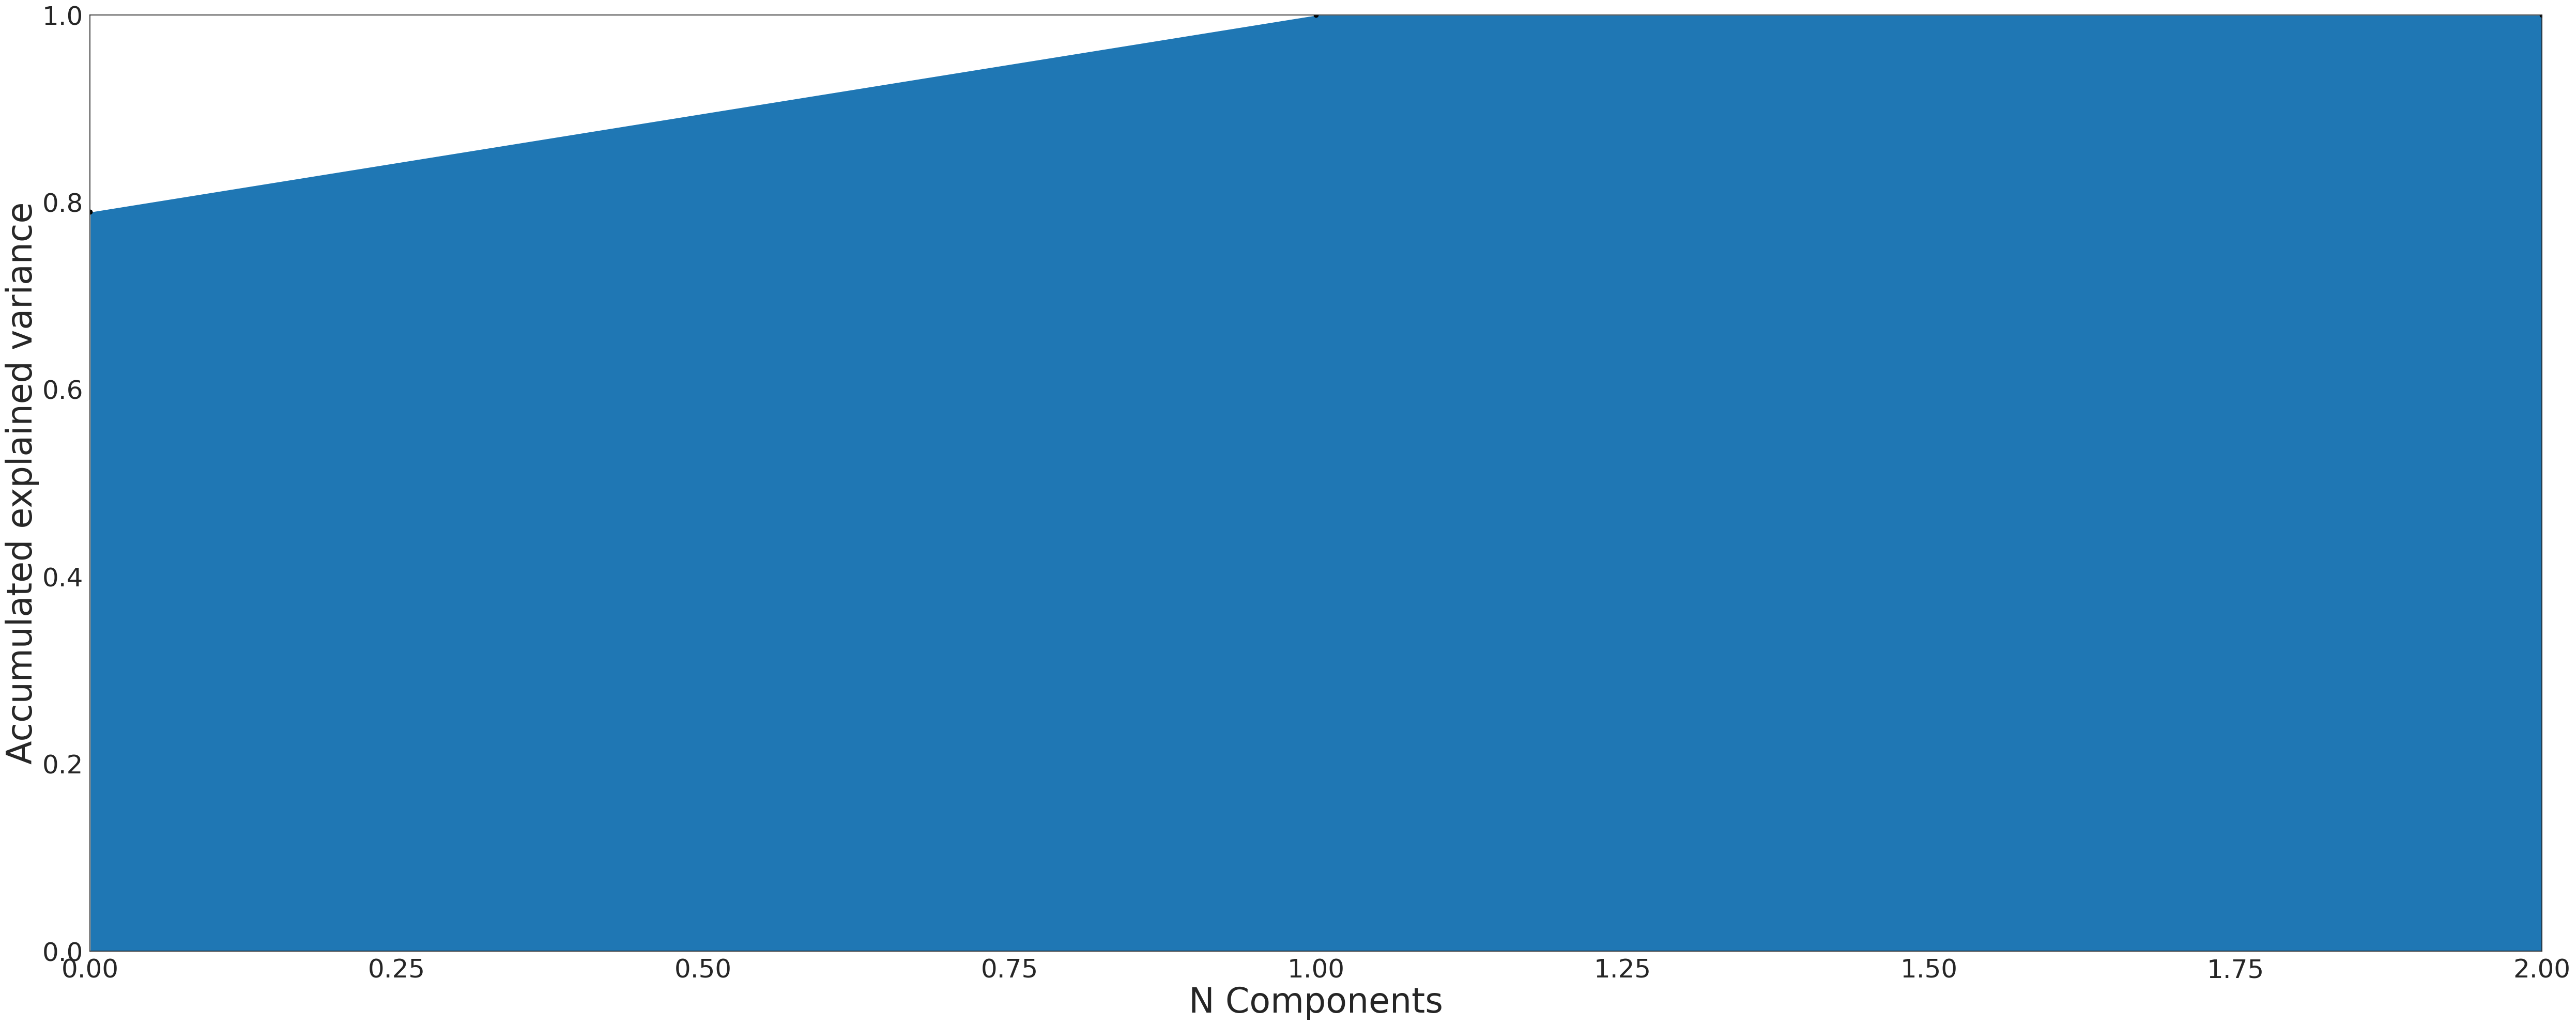

In [21]:
# usamos la funcion plot_explained_variance creada anteriormente sobre la instancia de la clase PCA.
plot_explained_variance(pca)

$ \ $

$(11)$ Suppose a $99%$ threshold is sufficient for our task, let's see how many components (dimensions) we can drop:

In [22]:
# establecemos el valor del umbral
threshold = 0.99

# La función accumulate() se utiliza para obtener una secuencia acumulativa de valores aplicando una operación acumulativa a los elementos de una secuencia. En este caso, se está calculando la suma acumulativa de los elementos en la lista pca.explained_variance_ratio_.
acum = accumulate(pca.explained_variance_ratio_)

# En esta línea, se utiliza una comprensión de lista para encontrar el número mínimo de componentes principales necesarios para alcanzar o superar el umbral de varianza acumulada establecido. La función next() devuelve el primer elemento de la lista generado por la comprensión de lista que cumple la condición de x >= threshold. Esto nos dará el número de componentes principales que necesitamos mantener.
num = 0

for indice, x in enumerate(acum, 1):
  if x <= threshold:
    num = indice +1
  break

# Esta línea imprime un mensaje indicando cuántos componentes principales se deben mantener y cuántos se deben descartar. Utiliza f-strings para formatear el texto y mostrar el número de componentes principales requeridos (num) y el número de componentes principales que se descartarán (pca.n_components_-num).
print(f'We can keep the first {num} components and discard the other {pca.n_components_ - num}')

We can keep the first 2 components and discard the other 1


$ \ $

----

## ***Using PCA to Improve Facial Recognition***

$ \ $

In this part, we will apply a method called "Eigenfaces". The term "eigenfaces" is commonly used in the context of face recognition and is a specific application of the PCA (Principal Component Analysis) algorithm. Mathematically, the eigenfaces method in PCA can be described as follows:

$(1)$ $\color{lightblue}{\text{Data Preparation:}}$ Given a dataset of face images, each image is represented as a high-dimensional vector. The first step is to vectorize the images, converting them into a single column vector. These vectors form the dataset matrix $X$, where each column represents a face image.

$(2)$ $\color{lightblue}{\text{Data Standardization:}}$ The dataset matrix $X$ is typically standardized by subtracting the mean face vector from each column vector. This step ensures that the data is centered around zero and helps in obtaining meaningful principal components.

$(3)$ $\color{lightblue}{\text{Covariance Matrix Calculation:}}$ The covariance matrix $C$ is computed from the standardized dataset matrix $X$. The covariance matrix measures the relationship between the different features (pixels) of the face images.

$(4)$ $\color{lightblue}{\text{Eigenvalue Decomposition:}}$ The covariance matrix $C$ is then decomposed using eigenvalue decomposition. This decomposition provides a set of eigenvalues and eigenvectors. The eigenvectors, known as eigenfaces, represent the principal components of the face images. Each eigenface is a linear combination of the original face images.

$(5)$ $\color{lightblue}{\text{Eigenface Selection:}}$ The eigenfaces are sorted based on their corresponding eigenvalues, which indicate the amount of variance explained by each eigenface. The eigenfaces with higher eigenvalues capture more important facial features and variations in the dataset.

$(6)$ $\color{lightblue}{\text{Dimensionality Reduction:}}$ To reduce the dimensionality of the face images, a subset of the eigenfaces is selected. These eigenfaces form a new basis for representing the face images. The number of selected eigenfaces determines the level of dimensionality reduction and the amount of information retained.

$(7)$ $\color{lightblue}{\text{Face Reconstruction:}}$ The original face images can be approximated by projecting them onto the selected eigenfaces. This projection involves computing the weights or coefficients that represent the contribution of each eigenface to reconstruct a particular face image.

$ \ $


In summary, the eigenfaces method in $PCA$ aims to represent face images using a reduced set of eigenfaces that capture the most significant variations in the data. These eigenfaces serve as a basis for face representation, dimensionality reduction, and face reconstruction.

$ \ $

-----

## ***Exercise***

$ \ $

$(1)$ To beging with, we load the Labeled Faces in the Wild (LFW) people datasetclassification.

$ \ $

Esta base de datos contiene imágenes de rostros de personas famosas recopiladas de Internet. La función ***fetch_lfw_people*** se encuentra en el módulo $\color{lightgreen}{\text{sklearn.datasets}}$. Toma dos argumentos:

* $\color{lightblue}{\text{min_faces_per_person=70:}}$ Este argumento especifica que solo se deben incluir personas que tengan al menos 70 imágenes en la base de datos. Esto se utiliza para filtrar las imágenes y asegurarse de que solo se incluyan personas con una cantidad mínima de imágenes disponibles.

* $\color{lightblue}{\text{resize=0.4:}}$ Este argumento especifica que las imágenes deben redimensionarse a un tamaño del 40% del tamaño original. Esto se realiza para reducir la resolución de las imágenes y acelerar el procesamiento.

La función ***fetch_lfw_people*** devuelve un objeto que contiene el conjunto de datos cargado. En este caso, el objeto se guarda en la variable ***lfw_people***. Este objeto contiene atributos que permiten acceder a diferentes aspectos del conjunto de datos, como las imágenes de los rostros, las etiquetas de las personas y otra información relevante.




In [23]:
lfw_people = fetch_lfw_people(min_faces_per_person = 70, resize = 0.4)
lfw_people

{'data': array([[0.99607843, 0.9973857 , 0.9908497 , ..., 0.37908497, 0.38823533,
         0.38169935],
        [0.1503268 , 0.19607843, 0.1764706 , ..., 0.45882353, 0.44313726,
         0.53594774],
        [0.3398693 , 0.39607847, 0.49150327, ..., 0.7098039 , 0.72287583,
         0.7176471 ],
        ...,
        [0.3633987 , 0.3372549 , 0.30718955, ..., 0.19607843, 0.22091503,
         0.19346406],
        [0.19346406, 0.24705882, 0.34248367, ..., 0.7372549 , 0.6653595 ,
         0.6117647 ],
        [0.11633987, 0.10196079, 0.1254902 , ..., 0.13202615, 0.13594772,
         0.2535948 ]], dtype=float32),
 'images': array([[[0.99607843, 0.9973857 , 0.9908497 , ..., 0.29803923,
          0.24705882, 0.20784314],
         [0.99607843, 0.99346405, 0.9908497 , ..., 0.30588236,
          0.2535948 , 0.21699347],
         [0.96078426, 0.93071896, 0.86797386, ..., 0.28627452,
          0.24313726, 0.21568628],
         ...,
         [0.34509805, 0.26143792, 0.1764706 , ..., 0.42352942,
     

$ \ $

$(2)$ Introspect the images arrays to find the shapes (for plotting).

In [50]:
# N = number, h = height, w = width
N, h, w = lfw_people["images"].shape
target_names = lfw_people["target_names"]

$ \ $

$(3)$ We plot out each class and an image belonging to that class.

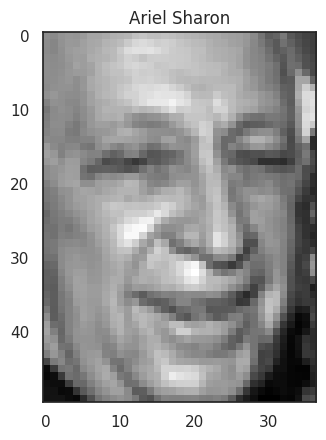

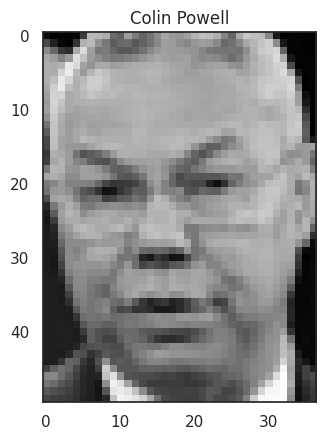

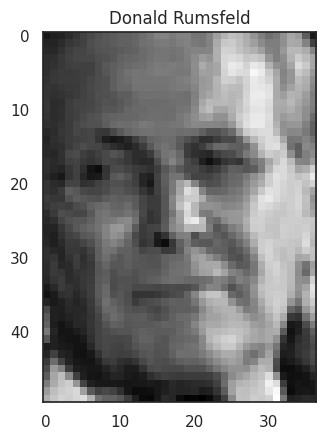

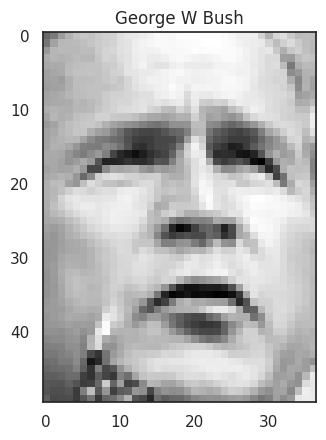

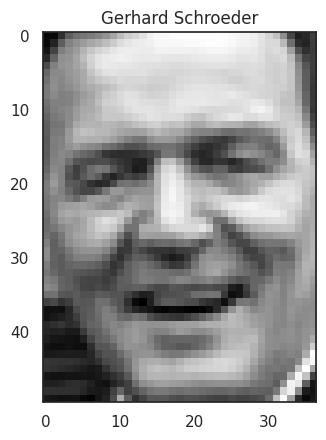

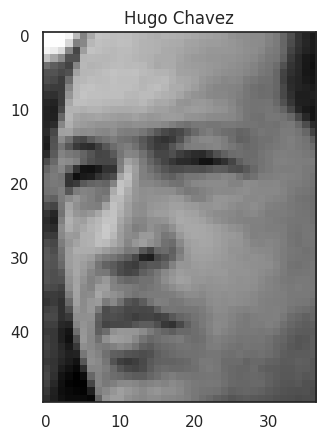

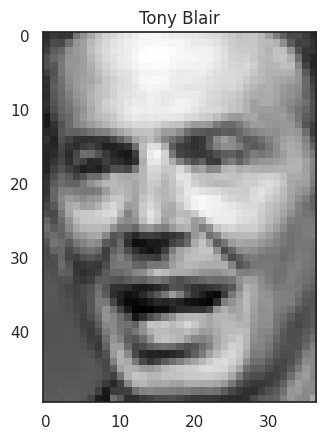

In [51]:
# Este código muestra imágenes de personas utilizando el conjunto de datos Labeled Faces in the Wild (LFW). Aquí está lo que hace cada parte del código:
# np.unique(lfw_people.target) devuelve los valores únicos de la variable target del conjunto de datos LFW. Estos valores representan las diferentes personas en las imágenes
# iteramos sobre cada persona en el conjunto de datos.
for person in np.unique(lfw_people.target):

    # describimos la siguiente mascara
    mascara = (lfw_people["target"] == person)

    # encuentramos el índice de la primera aparición de person en el arreglo lfw_people.target. Esto se hace utilizando la función argmax, que devuelve el índice del valor máximo.
    idx = np.argmax(mascara)

    # lfw_people.images contiene las imágenes del conjunto de datos LFW, y idx es el índice de la imagen de la actual person.
    image = lfw_people.images[idx]

    # mostramos la imagen correspondiente a la persona actual. La opción cmap='gray' indica que la imagen se mostrará en escala de grises.
    plt.imshow(image, cmap = 'gray')

    # establecemos el título de la imagen como el nombre de la persona actual. lfw_people.target_names es una lista que contiene los nombres correspondientes a cada valor de la variable objetivo.
    plt.title(lfw_people["target_names"][person])

    # mostramos las imagenes en pantalla
    plt.show()

$ \ $

$(4)$ We load our features $X$ and labels $y$. The images are flattened such that each one is a row in the NumPy array $X$.


In [26]:
# describimos las etiquetas del conjunto de datos cargado previamente. Estas etiquetas representan las identidades de las personas a las que corresponden las imágenes de los rostros. Cada etiqueta está asociada con una imagen en particular.
y = lfw_people["target"]

# Aquí, se asigna la variable X a los datos del conjunto de datos cargado. Estos datos representan las imágenes de los rostros y se almacenan en forma de una matriz, donde cada fila de la matriz corresponde a una imagen y cada columna representa una característica o píxel de la imagen.
X = lfw_people["data"]

# En esta línea, se asigna la variable n_features al número de características o dimensiones presentes en los datos. La forma de la matriz X es (n_samples, n_features), por lo que X.shape[1] devuelve el número de columnas de la matriz, que es igual al número de características. Esto proporciona información sobre la dimensionalidad de los datos, es decir, cuántas características se consideran en cada imagen del rostro.
n_features = X.shape[1]

$ \ $

$(5)$ We split the data into training and testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

$ \ $

$(6)$ We train a Support Vector Machines model for classification and use a random search method to find a set of optimal hyperparameters.

In [28]:
# Esta línea define un diccionario llamado param_grid que contiene los hiperparámetros y los rangos de búsqueda para la búsqueda aleatoria. En este caso, se están buscando los valores óptimos para los parámetros C y gamma del clasificador SVM. La función loguniform especifica una distribución logarítmica uniforme para los valores dentro de los rangos especificados.
param_grid = {"C": loguniform(1e3, 1e5), "gamma": loguniform(1e-4, 1e-1)}

# Se utiliza el clasificador SVM con kernel RBF y peso de clase equilibrado (class_weight="balanced") como estimador base
estimator = SVC(kernel = "rbf", class_weight = "balanced")

# Esta línea crea un objeto RandomizedSearchCV que realizará la búsqueda aleatoria de hiperparámetros. El argumento param_grid especifica los hiperparámetros y los rangos de búsqueda, y n_iter = 10 indica que se realizarán 10 iteraciones de búsqueda aleatoria.
clf = RandomizedSearchCV(estimator, param_grid, n_iter = 10)

# Esta línea ejecuta la búsqueda aleatoria de hiperparámetros utilizando los datos de entrenamiento X_train y las etiquetas de entrenamiento y_train. El objeto clf se ajusta/entrena con los datos de entrenamiento para encontrar la combinación óptima de hiperparámetros.
clf.fit(X_train, y_train)

RandomizedSearchCV(estimator=SVC(class_weight='balanced'),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f746915de40>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f746c34e4a0>})

$ \ $

$(7)$ We make a prediction using the test data.

In [29]:
# se utiliza para hacer predicciones utilizando un modelo entrenado (clf) en un conjunto de datos de prueba (X_test). Las predicciones resultantes se almacenan en la variable y_pred.
y_pred = clf.predict(X_test)

$ \ $

$(8)$ Let's see how well our `SVC` did on the test data.


Text(46.24999999999999, 0.5, 'Truth Value')

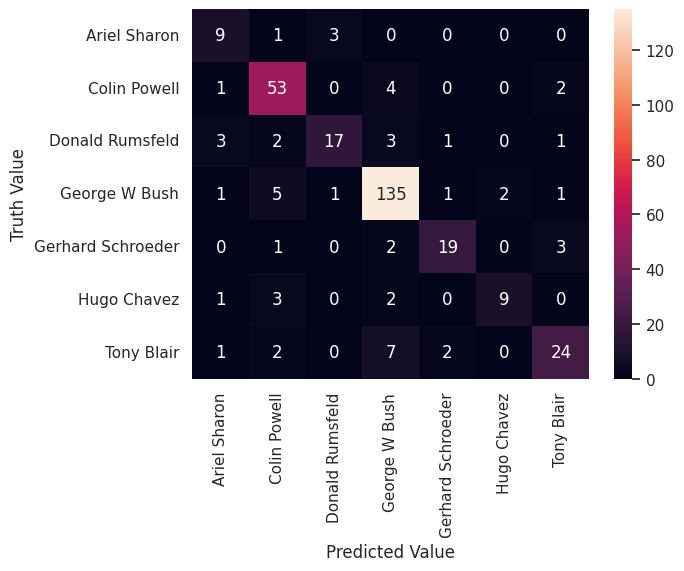

In [30]:
# Esta línea genera la matriz de confusión utilizando la función confusion_matrix de la biblioteca sklearn.metrics.
conf = confusion_matrix(y_test, y_pred)

# la matriz de confusión se visualiza como un mapa de calor utilizando la función heatmap de seaborn. Los argumentos annot=True se utilizan para mostrar los valores dentro de las celdas, xticklabels y yticklabels se utilizan para etiquetar los ejes x e y respectivamente con los nombres de las clases (lfw_people.target_names), y fmt='g' se utiliza para formatear los valores numéricos en formato general.
hmap = sns.heatmap(conf, annot = True, xticklabels = lfw_people.target_names, yticklabels = lfw_people.target_names, fmt = 'g')

# Esta línea establece la etiqueta del eje x del mapa de calor como 'Predicted Value', lo cual indica las etiquetas de clase predichas.
hmap.set_xlabel('Predicted Value')

# Esta línea establece la etiqueta del eje y del mapa de calor como 'Truth Value', lo cual indica las etiquetas de clase verdaderas.
hmap.set_ylabel('Truth Value')

We see all the images are being classifed as George Bush. Clearly it's having trouble differentiating between the faces.

$ \ $

$(9)$ Now, let's try using PCA, we fit a PCA model.

In [31]:
# Esta línea crea un objeto de la clase PCA con los parámetros svd_solver='full' y whiten=True.
# svd_solver = 'full' especifica el algoritmo de descomposición de valores singulares (Singular Value Decomposition, SVD) que se utilizará en el PCA. En este caso, se utiliza el solucionador "full", que se adapta mejor a conjuntos de datos grandes.
# whiten = True indica que se aplicará el preprocesamiento de "blanqueo" a los datos antes de realizar el PCA. El blanqueo de los datos ajusta la varianza de cada característica a 1 y garantiza que las características no estén correlacionadas.
pca = PCA(svd_solver = 'full',  whiten = True)

# Esta línea ajusta/entrenamos el objeto pca a los datos de entrenamiento X_train. El método fit calcula los componentes principales y realiza la transformación de los datos según los componentes principales.
pca.fit(X_train)

PCA(svd_solver='full', whiten=True)

$ \ $

$(10)$ We find the projections on to each principle  component for a person int the dataset, we select the sample ***person_index***.

In [32]:
# Esta parte del código selecciona la segunda fila (instancia) de la matriz de datos original X.
data = X[1,:]

# reshape(1, -1) se utiliza para cambiar la forma de los datos seleccionados. En este caso, se está transformando la fila seleccionada en una matriz de una sola fila (1) y manteniendo el número de columnas original (-1).
data = data.reshape(1, -1)

# Esta línea de código realiza la transformación de los datos seleccionados utilizando el modelo PCA previamente ajustado/entrenado (pca). El método transform aplica la transformación de PCA a los datos seleccionados.
X_hat = pca.transform(data)

$ \ $

$(11)$ We can find the projections back to each component.

In [33]:
# La imagen se obtiene al aplicar la transformación inversa del PCA (pca.inverse_transform(Xhat)) a los datos transformados Xhat
inv = pca.inverse_transform(X_hat)

# Cambiamos la forma de los datos a (h, w) utilizando reshape(h, w) para que coincida con las dimensiones originales de la imagen.
inv = inv.reshape(h, w)

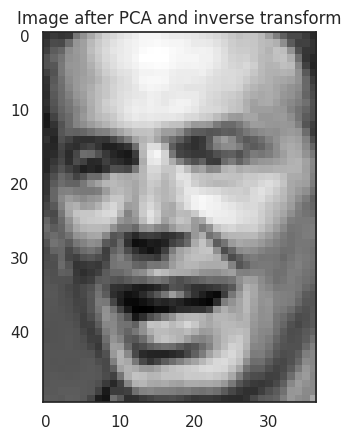

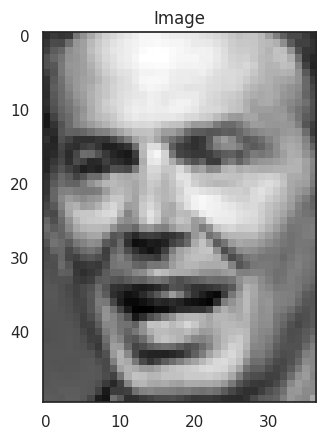

In [34]:
# Esta línea muestra la primera imagen utilizando la función imshow de matplotlib. El argumento cmap='gray' se utiliza para mostrar la imagen en escala de grises.
plt.imshow(inv, cmap = 'gray')

# Esta línea establece el título de la primera imagen como "Image after PCA and inverse transform".
plt.title("Image after PCA and inverse transform")

# mostramos la imagen en pantalla
plt.show()


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea muestra la segunda imagen utilizando la función imshow. La imagen se obtiene directamente de lfw_people.images utilizando el índice person_index. El argumento cmap='gray' se utiliza para mostrar la imagen en escala de grises.
plt.imshow(lfw_people["images"][1], cmap = 'gray')

# Esta línea establece el título de la segunda imagen como "Image".
plt.title("Image")

# Esta línea muestra la segunda imagen en la ventana de visualización.
plt.show()

$ \ $

$(12)$ We plot the cumulative distribution.

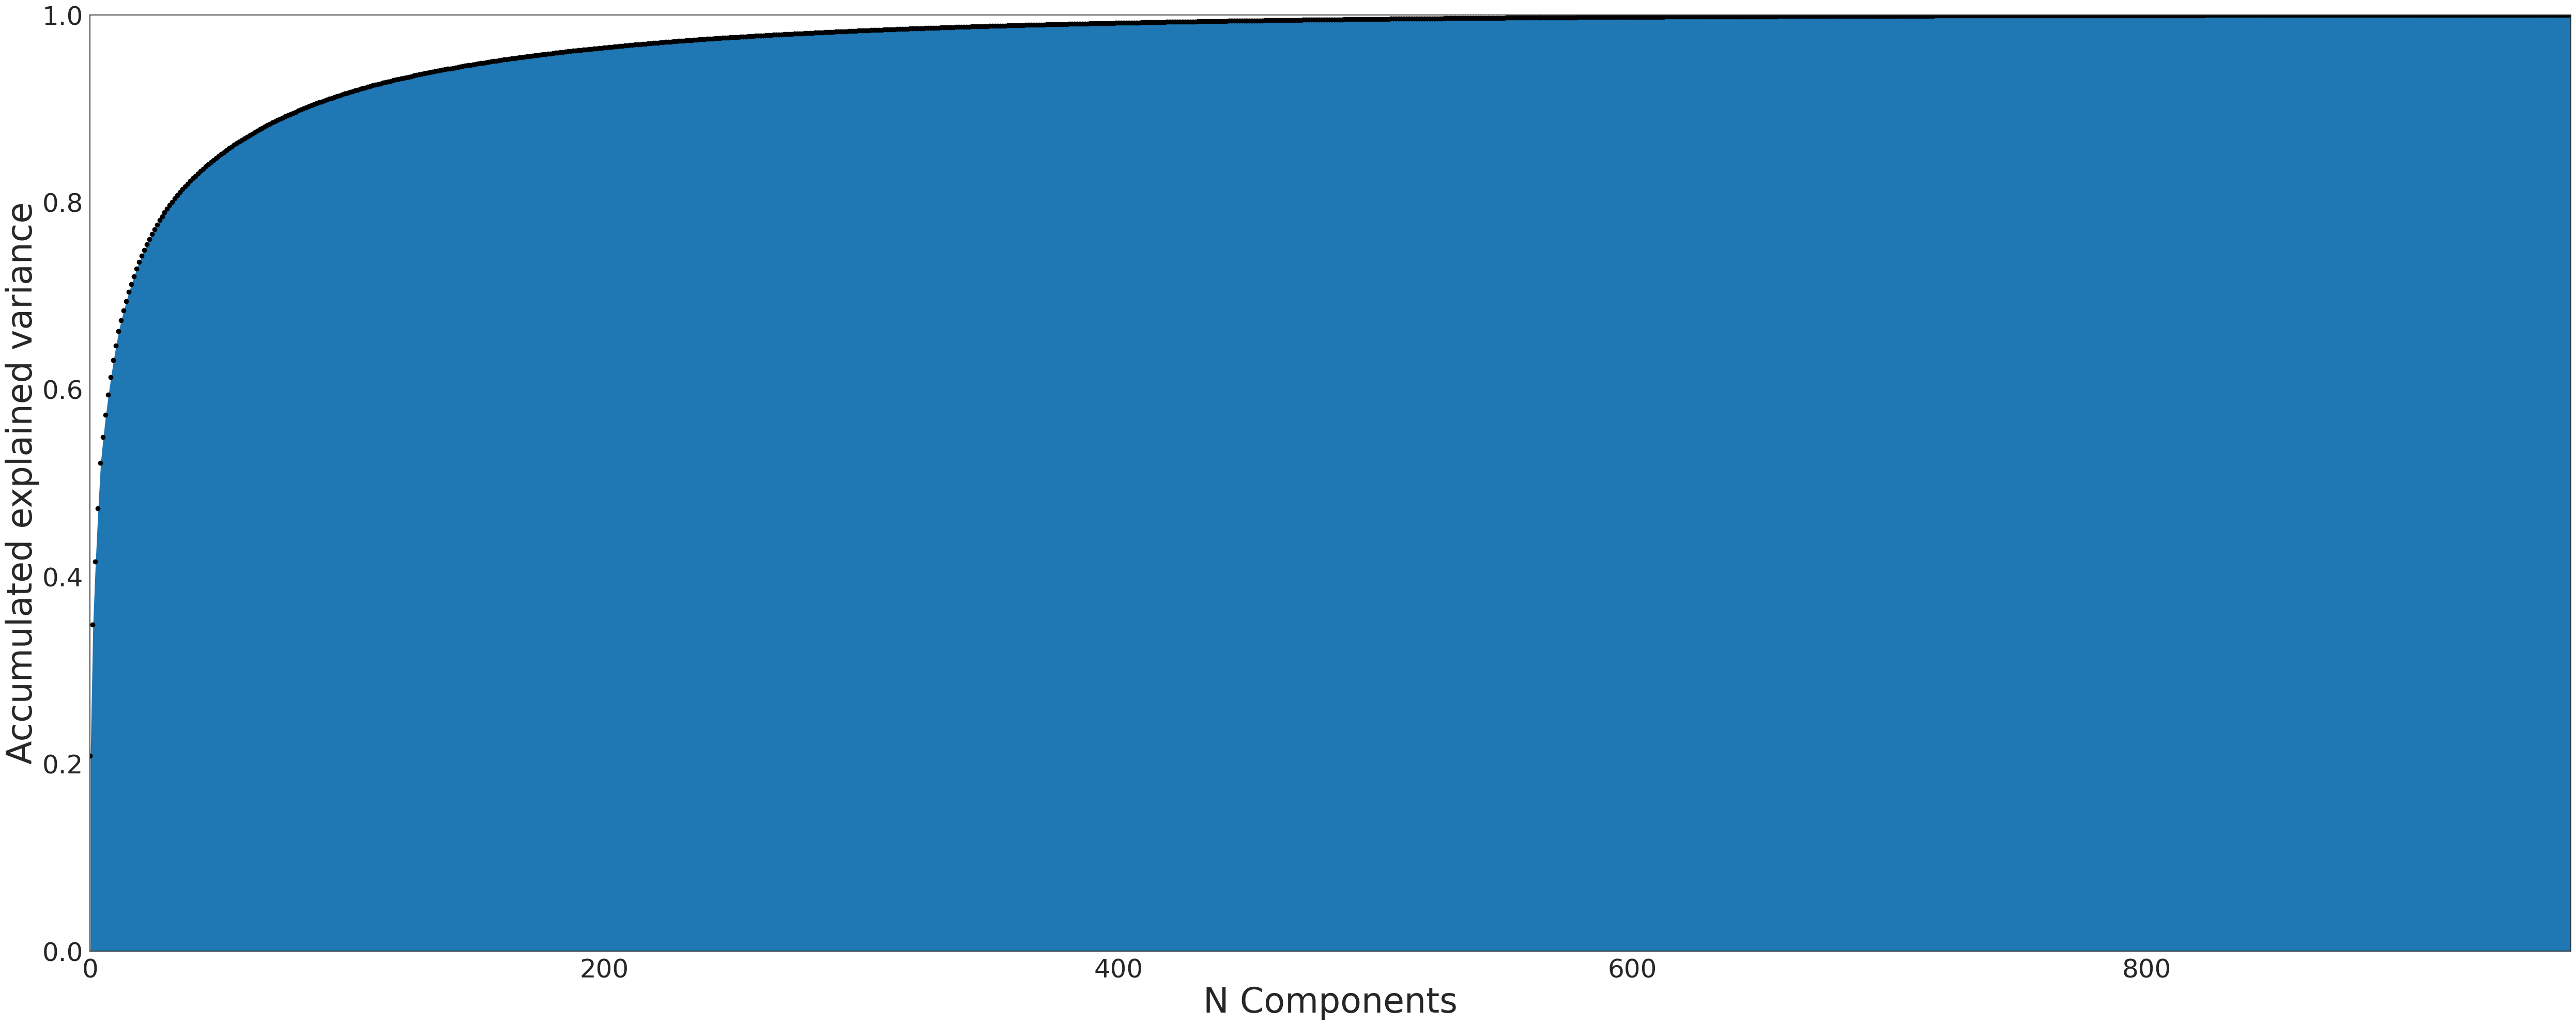

In [35]:
# usamos la funcion anterior para relizar un plot con el modelo pca
plot_explained_variance(pca)

# mostramos la imagen en pantalla
plt.show()

It looks like $150$ components explain over $95\%$ of the variance, usually $80\%$ will do, let's try and visualize some components.


$ \ $

$(13)$ Let's select the components that explain over 60% of the variance.

In [36]:
threshold = 0.6

$ \ $

$(14)$ This corresponds to $8$ principle components.

In [37]:
# Esta línea calcula la acumulación de la proporción de varianza explicada por cada componente principal utilizando np.cumsum(pca.explained_variance_ratio_).
n = np.cumsum(pca.explained_variance_ratio_)

# Comparamos cada valor acumulado con 0.6 y devuelve un arreglo booleano True o False indicando si cada componente principal cumple con el umbral de explicar menos del 60% de la varianza.
components = (n <= threshold)

# Esta línea suma los valores booleanos en el arreglo components. Como los valores booleanos se tratan como 1 para True y 0 para False en operaciones de suma, esta expresión devuelve la cantidad de componentes principales que cumplen con el umbral establecido.
components.sum()

8

$ \ $

$(15)$ We can reshape the principle components to a rectangle and plot them.

***Note:*** Remember the images are linear combinations of these components.

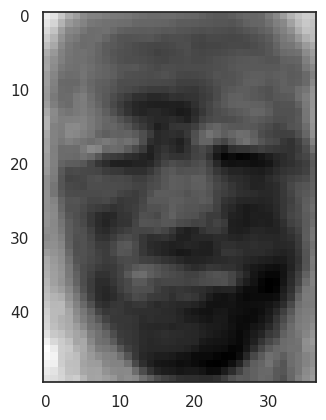

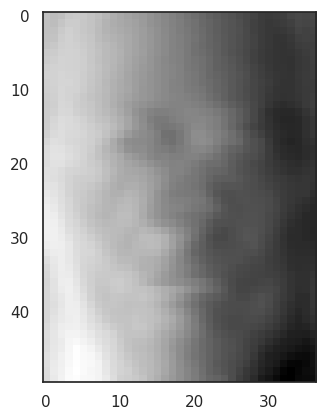

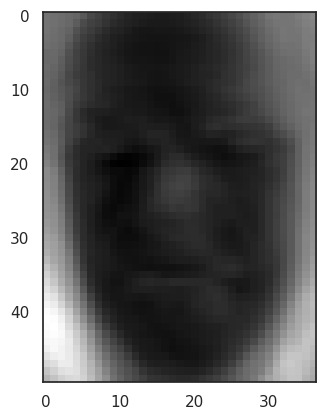

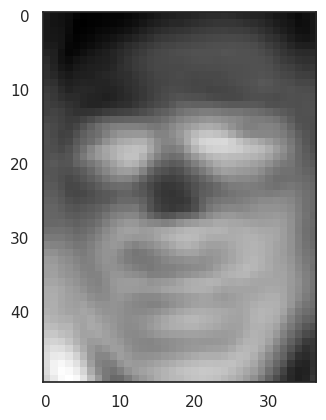

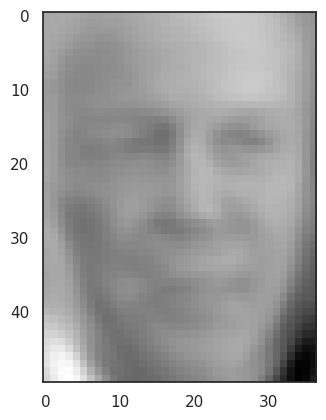

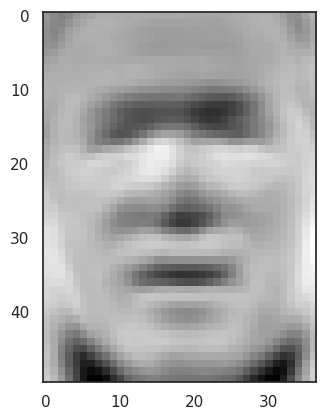

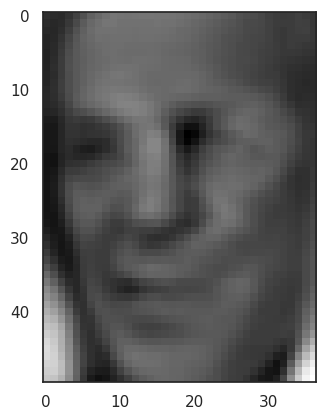

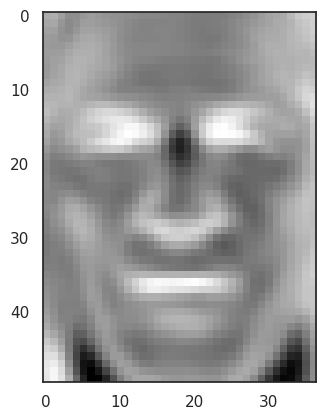

In [38]:
# pca.components_ contiene los componentes principales obtenidos del PCA.
# pca.components_[components, :] selecciona los componentes principales que cumplen con la condición definida en el arreglo components (que se generó previamente).
# La estructura for itera sobre cada componente principal seleccionado.
for component in pca.components_[components, :]:

    # Esta línea cambia la forma del componente principal seleccionado a (h, w), donde h es la altura de la imagen y w es el ancho de la imagen. Esto es necesario para asegurarse de que la forma del componente coincida con las dimensiones de la imagen original.
    component = component.reshape(h, w)

    # Esta línea muestra el componente principal como una imagen en escala de grises utilizando la función imshow de matplotlib. component es la matriz del componente principal seleccionado y cmap='gray' se utiliza para mostrar la imagen en escala de grises.
    plt.imshow(component, cmap = 'gray')

    # Esta línea muestra la imagen del componente principal en la ventana de visualización.
    plt.show()

$ \ $

$(16)$ Let's now use PCA with `n_components = 150`.


In [39]:
# Esta línea crea un objeto de la clase PCA con los siguientes parámetros:
# n_components = 150: Especifica el número de componentes principales a retener después del PCA. En este caso, se establece en 150.
# svd_solver = "randomized": Especifica el algoritmo de descomposición de valores singulares (SVD) a utilizar. "Randomized" se refiere a un enfoque de SVD aleatorizado que es eficiente para matrices grandes.
# whiten = True: Indica si los datos transformados deben ser "blanqueados", es decir, escalados para tener una varianza unitaria en cada componente principal.
pca = PCA(n_components = 150, svd_solver = "randomized", whiten = True)

# Esta línea ajusta/entrena el modelo PCA a los datos de entrenamiento X_train. Esto calcula los componentes principales utilizando los datos de entrenamiento y los almacena en el objeto pca para su uso posterior.
pca.fit(X_train)

PCA(n_components=150, svd_solver='randomized', whiten=True)

$ \ $

$(17)$ We apply the PCA transform on the training and testing data.

In [40]:
# tomamos el conjunto de datos de entrenamiento X_train y lo transformamos utilizando la técnica de PCA. La variable X_train_pca guarda el resultado de esta transformación.
X_train_pca = pca.transform(X_train)

# tomamos el conjunto de datos de prueba X_test y lo transforma utilizando la misma transformación PCA que se aplicó al conjunto de datos de entrenamiento.
X_test_pca = pca.transform(X_test)


$ \ $

$(18)$ Let's look at one of the images using <code>person_index = 1</code>.

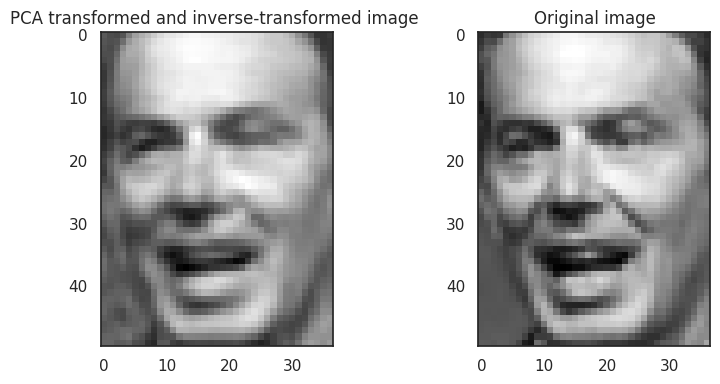

In [41]:
# creamos una nueva figura con un tamaño de 8 pulgadas de ancho por 4 pulgadas de alto.
plt.figure(figsize = (8, 4))


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea crea otra área de subplot en la figura, también con una distribución de 1 fila y 2 columnas. El argumento 2 indica que este es el segundo subtrazado y se debe ubicar en la segunda columna.
plt.subplot(1, 2, 1)

#  Esta línea toma una fila específica del conjunto de datos X (posición 1) y la remodela en una matriz de 1 fila y longitud desconocida (-1). Esto se hace para preparar los datos para la transformación PCA inversa
new_data = X[1, :].reshape(1, -1)

# Esta línea aplica una transformación PCA a los datos new_data utilizando el objeto PCA previamente definido como pca.
transf = pca.transform(new_data)

# Esta línea realiza una transformación inversa utilizando la matriz de transformación PCA inversa (pca.inverse_transform()) sobre los datos transformados transf.
inv = pca.inverse_transform(transf)

# Esta línea remodela la matriz inv para que tenga las dimensiones originales de la imagen (h y w). Esto se hace para preparar la imagen para su visualización.
inv = inv.reshape(h, w)

# Esta línea muestra la imagen transformada inversa utilizando la función imshow de matplotlib. La imagen mostrada es inv, que es la imagen inversamente transformada. El argumento cmap='gray' se utiliza para indicar que se debe mostrar en escala de grises.
plt.imshow(inv, cmap = 'gray')

# Esta línea establece un título para el segundo subplot, que indica que la imagen mostrada es la imagen transformada y luego inversamente transformada mediante PCA.
plt.title("PCA transformed and inverse-transformed image ")


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea crea un área de subtplot en la figura con una distribución de 1 fila y 2 columnas. El argumento 1 indica que este es el primer subplot y el número 1 siguiente indica que se debe ubicar en la primera columna.
plt.subplot(1, 2, 2)

# Esta línea muestra una imagen en escala de grises utilizando la función imshow de matplotlib. La imagen mostrada es lfw_people.images[1, :, :], que es la imagen original en la posición 1 del conjunto de imágenes lfw_people. El argumento cmap='gray' se utiliza para indicar que se debe mostrar en escala de grises.
plt.imshow(lfw_people["images"][1], cmap = 'gray')

# Esta línea establece un título para el primer subplot, que indica que la imagen mostrada es la imagen original.
plt.title("Original image")


#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


# Esta línea ajusta automáticamente el espacio entre los subtrazados para que se vean correctamente en la figura.
plt.tight_layout()

# mostramos la imagen creada en pantalla
plt.show()

$ \ $

$(19)$ We train the model and find the best Hyperparameters using the transformed data.

In [42]:
# Esta línea define una cuadrícula de búsqueda de hiperparámetros llamada param_grid. En este caso, se especifican dos hiperparámetros para el clasificador SVC: C y gamma. Los valores de los hiperparámetros se muestrean aleatoriamente en una escala logarítmica utilizando la función loguniform dentro del rango dado.
param_grid = {"C": loguniform(1e3, 1e5), "gamma": loguniform(1e-4, 1e-1)}

# El clasificador utilizado es SVC con un kernel radial (rbf) y el peso de clase equilibrado (balanced).
clasificator = SVC(kernel = "rbf", class_weight = "balanced")

# Esta línea crea un objeto RandomizedSearchCV para realizar la búsqueda aleatoria de hiperparámetros. Se proporciona la cuadrícula de búsqueda param_grid y se especifica que se realizarán 10 iteraciones de búsqueda aleatoria (n_iter=10)
clf = RandomizedSearchCV(clasificator, param_grid, n_iter = 10)

# Esta línea ajusta/entrena el modelo de clasificación clf utilizando los datos de entrenamiento transformados por PCA (X_train_pca) y las etiquetas correspondientes (y_train). El objeto RandomizedSearchCV realiza la búsqueda aleatoria de hiperparámetros y ajusta el clasificador SVC con los mejores hiperparámetros encontrados durante la búsqueda.
clf = clf.fit(X_train_pca, y_train)

$ \ $

$(20)$ We see the model using PCA performs much better.

Text(46.24999999999999, 0.5, 'Truth Value')

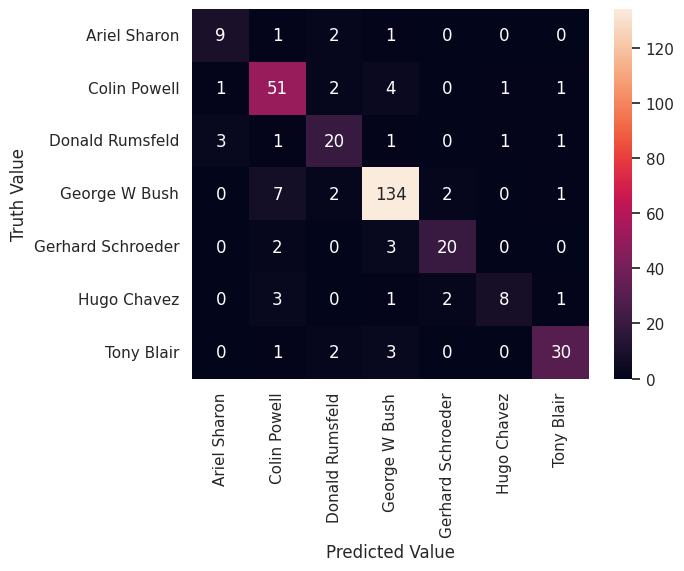

In [43]:
# Esta línea utiliza el modelo entrenado clf para hacer predicciones en los datos de prueba transformados por PCA (X_test_pca).
y_pred = clf.predict(X_test_pca)

# Esta línea calcula la matriz de confusión comparando las etiquetas verdaderas (y_test) con las predicciones realizadas por el modelo (y_pred). La matriz de confusión muestra la cantidad de predicciones correctas e incorrectas para cada clase.
conf = confusion_matrix(y_test, y_pred)

# Esta línea crea un mapa de calor (heatmap) utilizando la biblioteca seaborn. El mapa de calor se basa en la matriz de confusión (conf). El argumento annot=True agrega anotaciones con los valores numéricos en cada celda del mapa de calor. Los argumentos xticklabels y yticklabels se utilizan para establecer las etiquetas de las clases en los ejes x e y, respectivamente. El argumento fmt='g' se utiliza para mostrar los valores numéricos sin formato científico.
hmap = sns.heatmap(conf, annot = True, xticklabels = lfw_people.target_names, yticklabels = lfw_people.target_names, fmt = 'g')

# Esta línea establece la etiqueta del eje x del mapa de calor como "Valor Predicho".
hmap.set_xlabel('Predicted Value')

# Esta línea establece la etiqueta del eje y del mapa de calor como "Valor Verdadero".
hmap.set_ylabel('Truth Value')

$ \ $

-----

## ***Exercises***

$ \ $

$(1)$ We download and clean the dataset `energydata_complete.csv` containing real-world energy data.


In [44]:
# describimos la url del conjunto de datos
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/energydata_complete.csv'

# leemos el conjunto de datos que estan en formato csv
df = pd.read_csv(url)

# borramos la columna date
df.drop('date', axis = 1, inplace = True)

# Esta línea elimina todas las filas del DataFrame df que contengan valores faltantes (NaN). La función dropna() se utiliza para filtrar las filas que contienen valores NaN y se asigna el resultado nuevamente a la variable df.
df = df.dropna()

# Esta línea convierte todos los valores en el DataFrame df al tipo de datos float64. La función astype() se utiliza para realizar la conversión de tipo y se especifica np.float64 como el tipo al que se desea convertir.
df = df.astype(np.float64)

# mostramos los primeros 5 renglones en pantalla
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60.0,30.0,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60.0,30.0,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50.0,30.0,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50.0,40.0,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60.0,40.0,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


$ \ $

$(2)$ Scale the data in $df$ using sklearn.preprocessing.StandardScaler.

In [45]:
# Esta línea crea una instancia del objeto StandardScaler, que se utilizará para realizar la estandarización de los datos. El StandardScaler es una técnica comúnmente utilizada para estandarizar características numéricas al restar la media y dividir por la desviación estándar.
scaler = StandardScaler()

# Esta línea aplica la transformación de estandarización a todas las columnas del DataFrame df. La función fit_transform() ajusta el StandardScaler a los datos y luego realiza la transformación en el DataFrame df.
df[:] = scaler.fit_transform(df)

# mostramos las primeras 5 lineas
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,-0.367676,3.301264,-1.118645,1.843821,-0.520411,1.073683,-1.235063,1.686130,-0.908217,1.506438,...,-1.217324,0.958136,-0.152647,-2.976328,0.82208,1.207694,2.091596,0.366975,-0.807974,-0.807974
1,-0.367676,3.301264,-1.118645,1.616807,-0.520411,1.057097,-1.235063,1.704566,-0.908217,1.604528,...,-1.200778,0.965363,-0.174588,-2.962813,0.82208,1.071703,1.766584,0.343135,-0.440240,-0.440240
2,-0.465215,3.301264,-1.118645,1.517959,-0.520411,1.033550,-1.235063,1.748608,-0.944115,1.580918,...,-1.233869,0.950910,-0.196529,-2.949298,0.82208,0.935713,1.441572,0.319294,0.252109,0.252109
3,-0.465215,4.561378,-1.118645,1.459321,-0.520411,1.024540,-1.235063,1.769092,-0.962063,1.542526,...,-1.233869,0.926821,-0.218470,-2.935783,0.82208,0.799723,1.116559,0.295454,1.408801,1.408801
4,-0.367676,4.561378,-1.118645,1.526336,-0.520411,1.009797,-1.235063,1.769092,-0.962063,1.497991,...,-1.233869,0.926821,-0.240411,-2.922268,0.82208,0.663733,0.791547,0.271613,-1.028122,-1.028122


$ \ $

$(3)$ Create a PCA object called pca and fit it to the dataframe $df$.

In [46]:
pca = PCA()
pca.fit(df)

PCA()

$ \ $

$(4)$ Find the minimum number of components that cover a total explained variance of  $95$  or more.

In [47]:
# Esta línea calcula una serie de booleanos que indican si la suma acumulativa de los ratios de varianza explicada en PCA alcanza o supera el valor de 0.95. La variable index es una matriz booleana que tiene True en las posiciones donde se cumple la condición y False en las demás.
index = pca.explained_variance_ratio_.cumsum() >= 0.95

# Esta línea utiliza la función argwhere() de NumPy para encontrar los índices donde la suma acumulativa de la varianza explicada alcanza o supera el valor de 0.95. argwhere() devuelve los índices en un arreglo NumPy.
n = np.argwhere(index)[0][0] + 1
n

12

$ \ $

$(5)$ Reduce your dataset to one with $PCA$ applied to it, where the new number of dimensions is the answer you got in the previous exercise. Assign the result to a variable called `reduced_data`.



In [48]:
# Esta línea crea una instancia del objeto PCA con el parámetro n_components establecido en 12. Esto significa que se seleccionarán y retendrán las 12 primeras componentes principales durante la transformación.
pca = PCA(n_components = 12)

# entrenamos nuestro modelo con el dataframe df
pca.fit(df)

# Esta línea ajusta/entrena el objeto PCA con los datos del DataFrame df utilizando el método fit(). Luego, se transforman los datos utilizando el método transform(), lo que significa que se aplica la reducción de dimensionalidad basada en el ajuste realizado previamente.
reduced_data = pca.transform(df)
reduced_data

array([[-2.92203946e+00, -4.68840173e+00, -1.54878445e+00, ...,
        -7.48954832e-01, -1.44840085e+00,  5.14294778e-01],
       [-2.94055084e+00, -4.61738152e+00, -1.02656376e+00, ...,
        -8.54024507e-01, -1.43713006e+00,  4.43644668e-01],
       [-2.98392233e+00, -4.53297073e+00, -5.78115826e-02, ...,
        -9.49800636e-01, -1.46056996e+00,  4.50181520e-01],
       ...,
       [ 7.86448104e+00, -2.70547935e+00,  5.34381181e-02, ...,
        -3.04490767e-01, -1.48512273e-01, -9.40177419e-02],
       [ 7.78699482e+00, -2.69026019e+00, -2.18375379e+00, ...,
        -1.89800385e-01, -3.82144979e-04, -2.70167563e-01],
       [ 7.66885302e+00, -2.64863422e+00,  4.39320754e-01, ...,
        -1.14343047e-01,  1.17961433e-01, -3.11431885e-01]])

$ \ $

$(6)$ Let's view the result as a `pandas.DataFrame`.

In [49]:
# describimos el numero de caracteristicas o rasgos
n = reduced_data.shape[1]

# describimos nombres para las columnas de reduced_data
columnas = [f'Component {i}' for i in range(n)]

# creamos un nuevo dataframe con la data reduced_data (array) y el nombre de las columnas creada anteriormente
frame = pd.DataFrame(reduced_data, columns = columnas)

# mostramos los primeros 5 renglones del nuevo dataframe
frame.head()

,Component 0,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11
0,-2.922039,-4.688402,-1.548784,1.200384,1.953325,-0.372920,2.529788,-0.640358,-2.475223,-0.748955,-1.448401,0.514295
1,-2.940551,-4.617382,-1.026564,1.273485,1.958929,-0.495274,2.237205,-0.583417,-2.463552,-0.854025,-1.437130,0.443645
2,-2.983922,-4.532971,-0.057812,1.455761,1.925351,-0.626959,1.941323,-0.559629,-2.499994,-0.949801,-1.460570,0.450182
3,-3.074540,-4.511345,1.503160,1.955986,2.803530,-0.560489,1.565012,-0.474952,-3.320774,-1.015322,-1.598426,0.410244
4,-3.050297,-4.486200,-1.798191,0.976510,2.843927,-0.700518,1.271911,-0.287486,-3.287537,-1.118612,-1.607083,0.419311
